# Сборный проект-1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Изучение общей информации файла

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменение типа данных: изменим столбец 'year_of_release' в формат int.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Предобработка данных: удалим строчки с пропуском в столбце 'name'. После удаления строк с пропусками в столбце 'name', также удалятся пропуски в 'genre'. Данные две строчки были не информативны.

In [9]:
data = data.dropna(subset=['name'])
#data.isna().sum()

In [10]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
data['year_of_release'].isna().sum() / data.shape[0]

0.016095255190570215

Видно, что процент пропусков в 'year_of_release' небольшой, поэтому удалим такие строки.

In [12]:
data = data.dropna(subset=['year_of_release'])

Пропуски в столбце 'rating' возникли из-за того, что организация ESRB не выставила данным играм рейтинг. Заполним такие пропуски текстом no rating.

In [13]:
data['rating'] = data['rating'].fillna('no_rating')

In [14]:
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заметим, что столбец содежрит уникальное значение - 'tbd'. Tbd - to be decided. Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить. С помощью errors='coerce' такие значение заменим на nan.

Пропуски в 'critic_score' и 'user_score' не трогаем.

In [16]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Также проверим таблицу на дубликаты.

In [19]:
data.duplicated().sum()

0

Посмотрим количество строк с одинаковыми значениями в 'name','platform','year_of_release'. Вряд ли за год могут выпустить несколько версий одной игры на одной платформе. Такие дубликаты удалим.

In [20]:
duplicates = data.duplicated(subset=['name','platform', 'year_of_release'], keep=False).sum()
print(duplicates)

2


In [21]:
data = data.drop_duplicates(subset=['name','platform', 'year_of_release'])

In [22]:
data.shape[0] / 16715

0.9837271911456775

Удалили меньше 2% данных.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [23]:
data['world_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

##  Исследование анализа данных

**Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?**

<AxesSubplot:xlabel='year_of_release'>

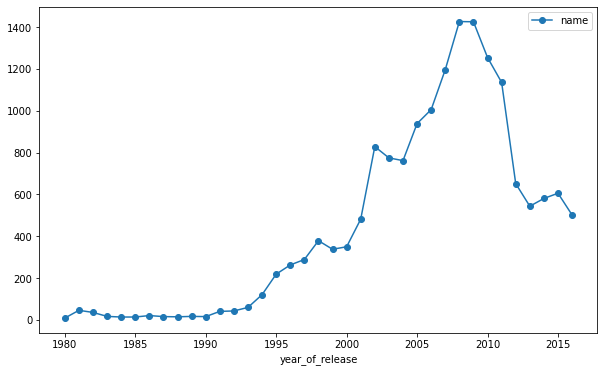

In [24]:
games_in_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_in_years.plot(kind='line', figsize=(10,6),  style = 'o-')

По графику видно, что продажи сильно начали увеличиваться с 1995, что объяснимо. С конца 90х происходит активное развитие компьютерной техники, в том числе и компьютерных игр. Важны ли данные за все периоды? Думаю, что для определения успешности игры данные можно изучать с 1995 года. Все, что было придумано ранее, скорее всего, либо сильно устарело к 2016 году, либо было использованно в более современных версиях.  

**Как менялись продажи по платформам? Анализ платформ с наибольшими суммарными продажами по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [25]:
top10_platforms = data.groupby('platform')['world_sales'].sum().sort_values(ascending=False).head(10)
top10_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: world_sales, dtype: float64

In [26]:
top10_platforms = data[data['platform'].isin(top10_platforms.index)]

In [27]:
top10_platforms = top10_platforms.query('year_of_release >= 1994')

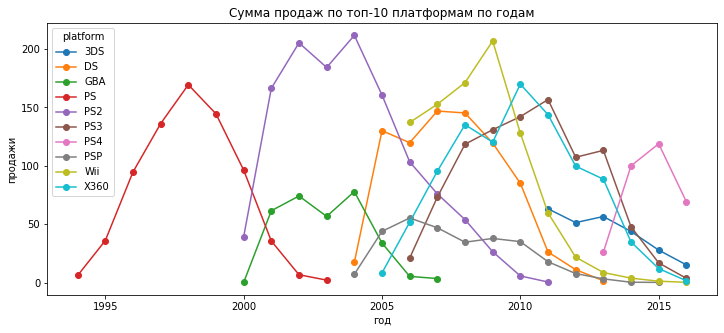

In [28]:
top10_platforms_in_years = top10_platforms.pivot_table(index='year_of_release', values='world_sales', columns='platform', aggfunc='sum')
top10_platforms_in_years.plot(kind='line', figsize=(12,5),  style = 'o-')
plt.title('Сумма продаж по топ-10 платформам по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.show()

По графику видно, что большинство платформ появилось в периоде с 2000 по 2007 год. Платформа в течении первых 5 лет активно развивается на рынке, достигает пика продаж, а затем идет на спад. На спаде одной платформы появляются другие новые платформы. Можно также заметить, что ближе к 2016 продажи на всех платформах падают. Возможно и популярность компьютерных игр также падает.

**Какие платформы лидируют по продажам, растут или падают? Несколько потенциально прибыльных платформ.**

In [29]:
data_actual = data.query('year_of_release >= 2012')

In [30]:
top10_platforms = data_actual.groupby('platform')['world_sales'].sum().sort_values(ascending=False).head(10)
top10_platforms

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: world_sales, dtype: float64

In [31]:
top10_platforms = data_actual[data_actual['platform'].isin(top10_platforms.index)]

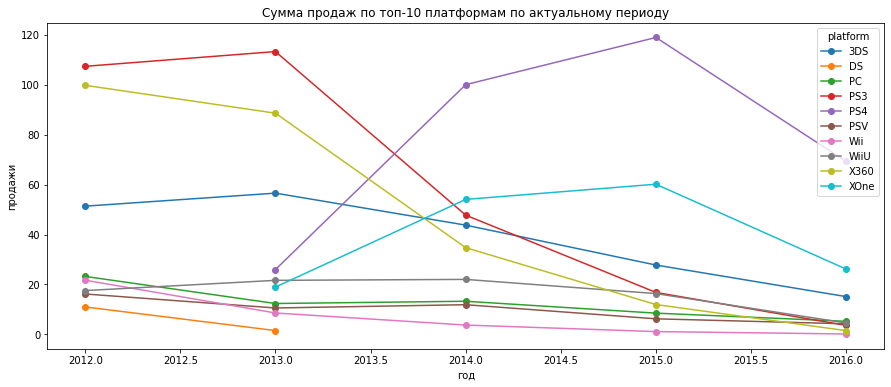

In [32]:
top10_platforms_in_years = top10_platforms.pivot_table(index='year_of_release', values='world_sales', columns='platform', aggfunc='sum')
top10_platforms_in_years.plot(kind='line', figsize=(15,6),  style = 'o-')
plt.title('Сумма продаж по топ-10 платформам по актуальному периоду')
plt.xlabel('год')
plt.ylabel('продажи')
plt.show()

На графике видно, что платформы, созданные в 2013, прошли пик продаж(2015 год), и в 2015-2016 годах продажи уже снижаются. Ожидается, что в 2017 продажи продолжат снижаться на всех представленных на графике платформах. Из всех платформ самые высокие продажи у PS4 и XOne. Они самые прибыльные. Возможно в 2017 поднимятся немного продажи PC.

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам**

In [33]:
platforms_actual = data_actual.query('["PS4", "XOne", "3DS", "PC"] in platform')

Text(0.5, 0.98, 'Глобальные продажи игр по платформам')

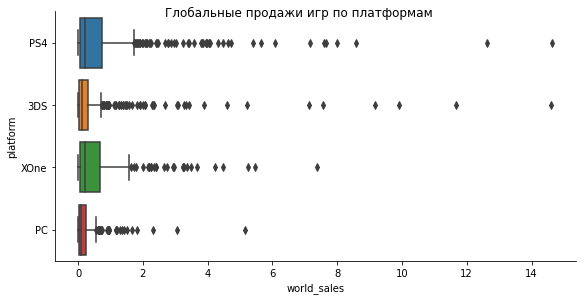

In [34]:
g = sns.catplot(y='platform', x='world_sales', kind="box", data=platforms_actual, height=4, aspect=2)
g.fig.suptitle('Глобальные продажи игр по платформам')

На этом графике показаны глобальные продажи по платформам с 2012 года. По ним видно, что самые высокие продажи у PS4 и XOne, как и на предыдущем графике.

Для того, чтобы увидеть точные границы квантилей, построим "ящик с усами" с помощью библиотеки matplotlob.

(0.0, 3.0)

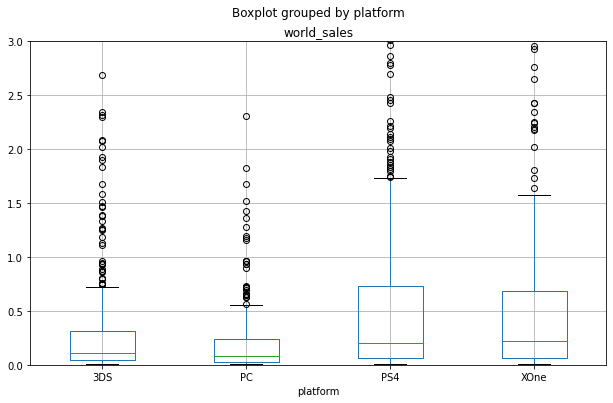

In [35]:
platforms_actual.boxplot(column='world_sales', by='platform', figsize=(10,6))
plt.ylim(0, 3)

Верхний квантиль у PS4 больше, чем у XOne. Это значит, что на платформе PS4 больше запущено игр и больше продаж. После XOne по убыванию количества продаж идет 3DS, а потом и PC.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Диаграмма рассеяния и корреляция между отзывами и продажами**

Для исследования возьмем самую популярную платформу - PS4.

In [36]:
ps4 = data_actual.query('platform == "PS4"')

Text(0.5, 1.0, 'График корреляции отзывов пользователей и глобальных продаж PS4')

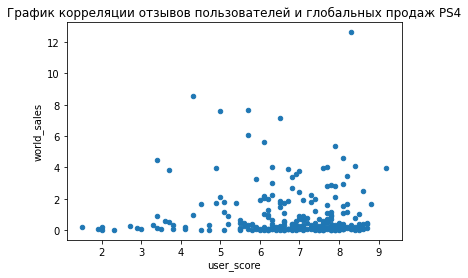

In [37]:
ps4.plot(kind='scatter', x='user_score', y='world_sales')
plt.title('График корреляции отзывов пользователей и глобальных продаж PS4')

Text(0.5, 1.0, 'График корреляции отзывов критиков и глобальных продаж PS4')

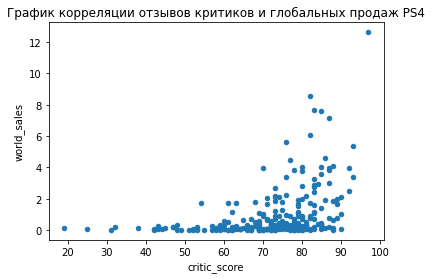

In [38]:
ps4.plot(kind='scatter', x='critic_score', y='world_sales')
plt.title('График корреляции отзывов критиков и глобальных продаж PS4')

Если посмотреть на графики корреляции, то можно увидеть, что чем выше оценка критиков, тем выше продажи. Корреляция между оценкой пользователей и продажами менее сильняя.

In [39]:
ps4['user_score'].corr(ps4['world_sales'])

-0.031957110204556376

In [40]:
ps4['critic_score'].corr(ps4['world_sales'])

0.40656790206178095

После подсчета корреляции связь между оценкой критиков и количеством продаж слабая. Связи между оценкой пользователей и количеством продаж практически нет, есть некая обратная зависимость.

**Соотнесение выводов с продажами игр на других платформах**

Для этого возьмем XOne, PC, 3DS и построим для них корреляцию между продажами и отзывами.

In [41]:
xone = data_actual.query('platform == "XOne"')
pc = data_actual.query('platform == "PC"')
trids = data_actual.query('platform == "3DS"')

In [42]:
xone[['critic_score', 'user_score', 'world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
world_sales,0.416998,-0.068925,1.000000


Очень слабая обратная зависимость между user_score и world_sales. Слабая связь между critic_score и world_sales.

In [43]:
pc[['critic_score', 'user_score', 'world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
world_sales,0.237243,-0.121867,1.000000


Слабая обратная зависимость между user_score и world_sales. Слабая связь между critic_score и world_sales(слабее, чем у xone и ps4)

In [44]:
trids[['critic_score', 'user_score', 'world_sales']].corr()

,critic_score,user_score,world_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
world_sales,0.320803,0.197583,1.000000


Слабая положительная связь между user_score и world_sales. Связь между critic_score и world_sales также слабая.

Таким образом, корреляция между critic_score, user_score и world_sales на всех платформах слабая или очень слабая.

**Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Text(0.5, 1.0, 'Распределение игр по жанрам')

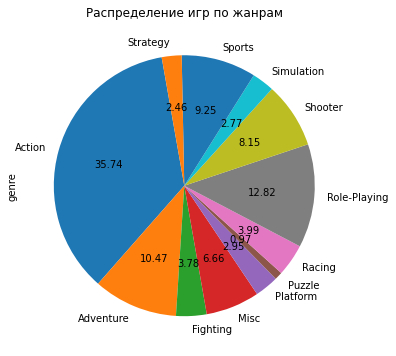

In [45]:
genre = data_actual.groupby('genre')['genre'].count()
genre.plot(kind='pie', autopct="%.2f", startangle=100, figsize=(10, 6))
plt.title('Распределение игр по жанрам')

In [46]:
sales_by_genre = data_actual.groupby('genre')['world_sales'].median()

Text(0.5, 1.0, 'Медианы продаж по жанрам')

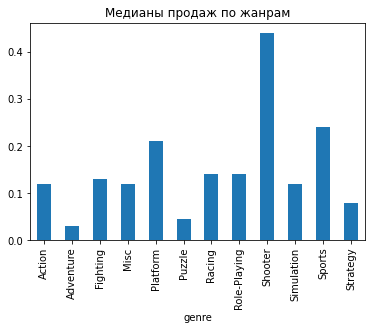

In [47]:
sales_by_genre.plot(kind='bar')
plt.title('Медианы продаж по жанрам')

По круговой диаграмме видно, что больше всего игр жанров action, role-playing и adventure. Однако больше всего продаж у жанров - shooter, sports и platform. Это самые прибыльные жанры. Что интересно, 35,7% занимают игры жанра action, 12,8% - role-playing, но продаж у этих жанров по сравнению с другими не так много. Возможно количество игр жанров action и role-playing со временем сократится. А количество игр жанра shooter, sports увеличится.

Меньше всего игр жанров puzzle, simulation и strategy. Среди них выше всего продажи у simulation, остальные - ниже.

## Портрет пользователя каждого региона

**Самые популярные платформы (топ-5) по регионам**

In [48]:
na_platforms = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
na_platforms = data_actual[data_actual['platform'].isin(na_platforms.index)]

Text(0.5, 1.0, 'Топ-5 платформ в Северной Америке по годам')

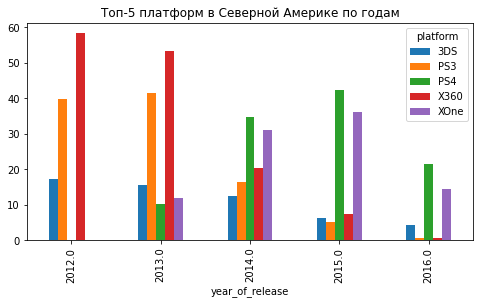

In [49]:
na_platforms_in_years = na_platforms.pivot_table(index='year_of_release', values='na_sales', columns='platform', aggfunc='sum')
na_platforms_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 платформ в Северной Америке по годам')

В Северной Америке в 2014-2016 из топ-5 больше всего пользовались PS4 и XOne, у них пик продаж был в 2015 году. К 2016 продажи игр на всех топ-5 платформах снижаются. В более раннем периоде 2012-2013 были популярны X360 и PS3, но в 2014 продажи у этих платформ резко снизились.

In [50]:
eu_platforms = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
eu_platforms = data_actual[data_actual['platform'].isin(eu_platforms.index)]

Text(0.5, 1.0, 'Топ-5 платформ в Европе по годам')

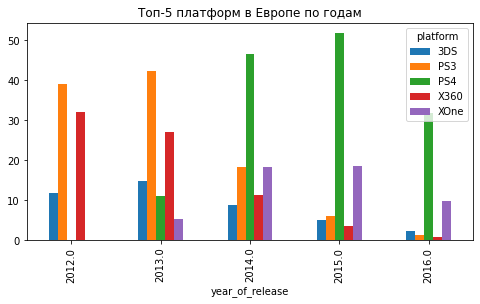

In [51]:
eu_platforms_in_years = eu_platforms.pivot_table(index='year_of_release', values='eu_sales', columns='platform', aggfunc='sum')
eu_platforms_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 платформ в Европе по годам')

В Европе в 2014-2016 из топ-5 лидером продаж является PS4. Продаж у XOne заметно меньше по сравнению с Северной Америкой. Пик продаж у PS4 также приходится на 2015 год. К 2016 продажи игр на всех топ-5 платформах снижаются. В более раннем периоде 2012-2013 были популярны X360 и PS3(как и в Северной Америке), но в 2014 продажи у этих платформ резко снизились.

In [52]:
jp_platforms = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
jp_platforms = data_actual[data_actual['platform'].isin(jp_platforms.index)]

Text(0.5, 1.0, 'Топ-5 платформ в Японии по годам')

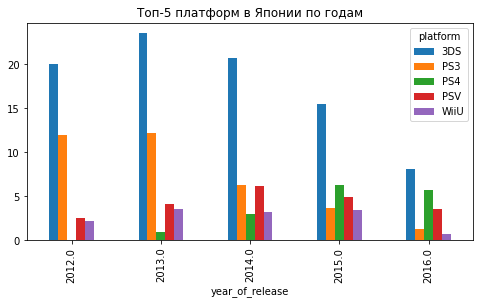

In [53]:
jp_platforms_in_years = jp_platforms.pivot_table(index='year_of_release', values='jp_sales', columns='platform', aggfunc='sum')
jp_platforms_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 платформ в Японии по годам')

В Японии на прортяжении всего изучаемого периода лидером продаж является 3DS. Продажи остальных платформ гораздо меньше. Как и в других регионах, к 2016 продажи у  платформ снижаются. 3DS на рынок вышла в 2011 году, поэтому в 2012-2013 можно увидеть, что в это время были также высокие продажи у PS3. 

(Производителями всех платформ является Япония) 

In [54]:
other_platforms = data_actual.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head()
other_platforms = data_actual[data_actual['platform'].isin(other_platforms.index)]

Text(0.5, 1.0, 'Топ-5 платформ в других регионах по годам')

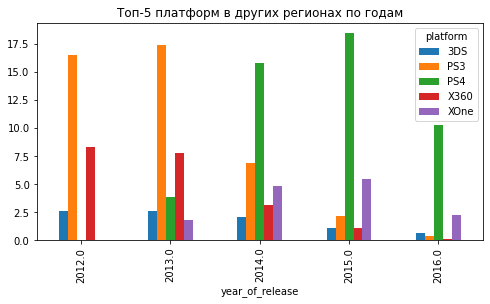

In [55]:
other_platforms_in_years = other_platforms.pivot_table(index='year_of_release', values='other_sales', columns='platform', aggfunc='sum')
other_platforms_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 платформ в других регионах по годам')

В остальных регионах в 2012-2013 годах преобладает PS3, в 2014-2015- PS4. Продажи к 2016 также снижаются. В Европе эти платформы также преобладают.

**Самые популярные жанры (топ-5)**

In [56]:
na_genres = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
na_genres = data_actual[data_actual['genre'].isin(na_genres.index)]

Text(0.5, 1.0, 'Топ-5 жанров в Северной Америке по годам')

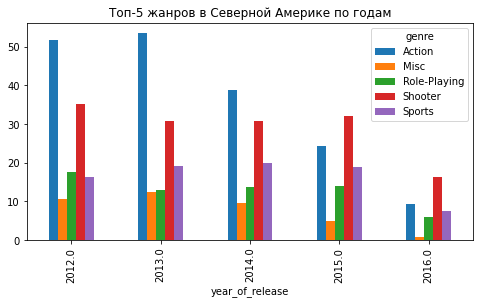

In [57]:
na_genres_in_years = na_genres.pivot_table(index='year_of_release', values='na_sales', columns='genre', aggfunc='sum')
na_genres_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 жанров в Северной Америке по годам')

In [58]:
eu_genres = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
eu_genres = data_actual[data_actual['genre'].isin(eu_genres.index)]

Text(0.5, 1.0, 'Топ-5 жанров в Европе по годам')

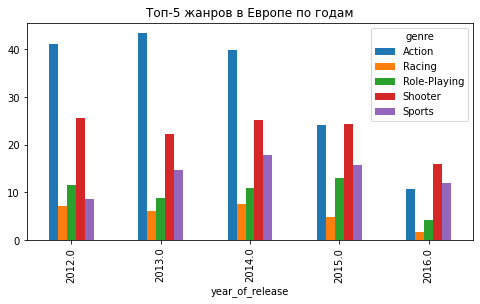

In [59]:
eu_genres_in_years = eu_genres.pivot_table(index='year_of_release', values='eu_sales', columns='genre', aggfunc='sum')
eu_genres_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 жанров в Европе по годам')

In [60]:
jp_genres = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
jp_genres = data_actual[data_actual['genre'].isin(jp_genres.index)]

Text(0.5, 1.0, 'Топ-5 жанров в Японии по годам')

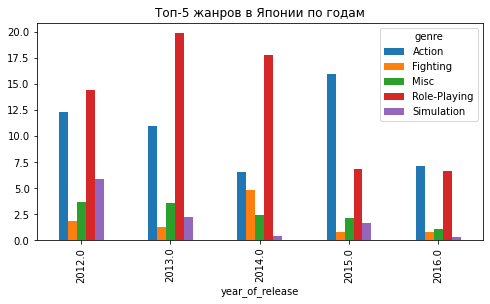

In [61]:
jp_genres_in_years = jp_genres.pivot_table(index='year_of_release', values='jp_sales', columns='genre', aggfunc='sum')
jp_genres_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 жанров в Японии по годам')

In [62]:
other_genres = data_actual.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head()
other_genres = data_actual[data_actual['genre'].isin(other_genres.index)]

Text(0.5, 1.0, 'Топ-5 жанров в других регионах по годам')

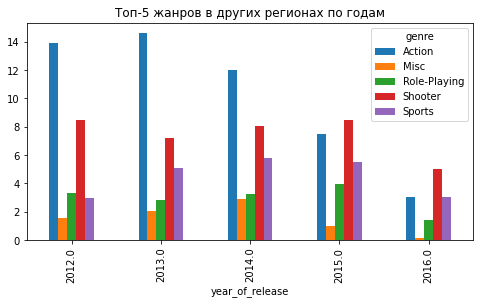

In [63]:
other_genres_in_years = other_genres.pivot_table(index='year_of_release', values='other_sales', columns='genre', aggfunc='sum')
other_genres_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Топ-5 жанров в других регионах по годам')

Во всех регионах кроме Японии преобладают action и shooter. В Японии shooter не входит в топ-5, там популярны action и role-playing. Опять, во всех регионах кроме Японии в 2012-2014 action - самый популярный, а в 2015-2016 - shooter. В Японии в 2012-2014 - role-playing, в 2015-2016 - action.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [64]:
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [65]:
na_rating = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating = data_actual[data_actual['rating'].isin(na_rating.index)]

Text(0.5, 1.0, 'Рейтинг ESRB в Северной Америке по годам')

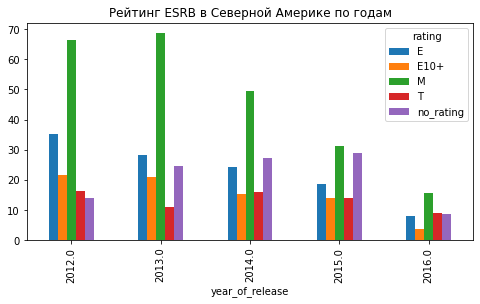

In [66]:
na_rating_in_years = na_rating.pivot_table(index='year_of_release', values='na_sales', columns='rating', aggfunc='sum')
na_rating_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Рейтинг ESRB в Северной Америке по годам')

В Северной Америке преобладают продажи с рейтингом M (подходит для лиц старше 17 лет), особенно в 2012-2014 годах. В 2015 году продажи с этим рейтингом практически сравнялись с продажами без рейтинга. Таким образом, к 2016 году рейтинг не так сильно влияет на количество продаж, как раньше.

In [67]:
eu_rating = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating = data_actual[data_actual['rating'].isin(eu_rating.index)]

Text(0.5, 1.0, 'Рейтинг ESRB в Европе по годам')

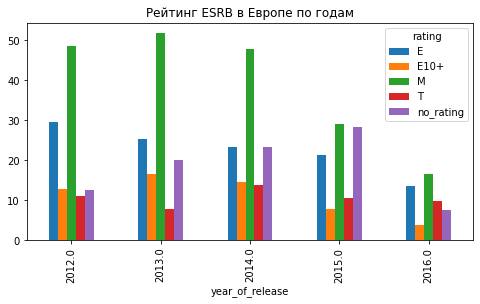

In [68]:
eu_rating_in_years = eu_rating.pivot_table(index='year_of_release', values='eu_sales', columns='rating', aggfunc='sum')
eu_rating_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Рейтинг ESRB в Европе по годам')

В Европе аналогичная ситуация с Северной Америкой.

In [69]:
jp_rating = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating = data_actual[data_actual['rating'].isin(jp_rating.index)]

Text(0.5, 1.0, 'Рейтинг ESRB в Японии по годам')

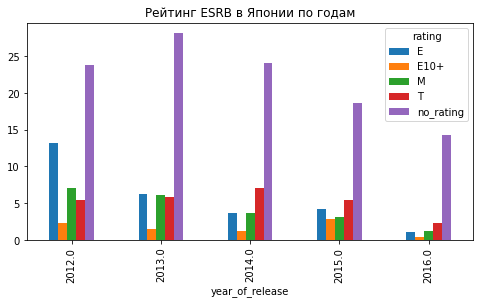

In [70]:
jp_rating_in_years = jp_rating.pivot_table(index='year_of_release', values='jp_sales', columns='rating', aggfunc='sum')
jp_rating_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Рейтинг ESRB в Японии по годам')

В Японии рейтинг не влияет на количество продаж на протяжении всего изучаемого периода.

In [71]:
other_rating = data_actual.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
other_rating = data_actual[data_actual['rating'].isin(other_rating.index)]

Text(0.5, 1.0, 'Рейтинг ESRB в других регионах по годам')

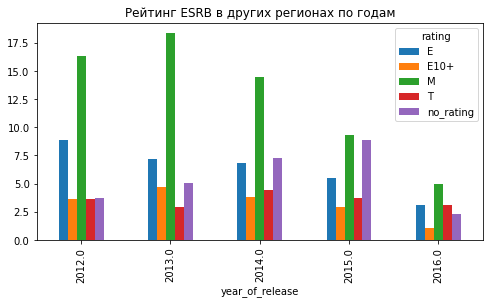

In [72]:
other_rating_in_years = other_rating.pivot_table(index='year_of_release', values='other_sales', columns='rating', aggfunc='sum')
other_rating_in_years.plot(kind='bar', figsize=(8,4))
plt.title('Рейтинг ESRB в других регионах по годам')

В других регионах аналогичная ситуация с Северной Америкой и Европой.

## Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Для проверки гипотезы:
- H0 - средние пользовательские рейтинги платформ Xbox One и PC равны
- H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны
- Используем t-тест, потому что сравниваем две независимые выборки.
- Уровень значимости - 0.05

In [73]:
xone_user_score = xone['user_score'].dropna() #убираем значения nan
pc_user_score = pc['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Получается, что гипотеза не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Средние пользовательские рейтинги жанров Action и Sports разные**

Для проверки гипотезы:
- H0 - средние пользовательские рейтинги жанров Action и Sports равны
- H1 - средние пользовательские рейтинги жанров Action и Sports не равны
- Используем t-тест, потому что сравниваем две независимые выборки.
- Уровень значимости - 0.05

In [74]:
act_genre = data_actual.query('genre == "Action"')
sport_genre = data_actual.query('genre == "Sports"')
act_genre_user_score = act_genre['user_score'].dropna()
sport_genre_user_score = sport_genre['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(act_genre_user_score, sport_genre_user_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Таким образом, мы отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны. Следовательно, cредние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

Что было сделано?
- Изучена общая информация данных
- Проведена подготовка данных к исследованию (изменение типа данных, удаление строк с пропусками в столбцах с именем и категорией жанра, исследование остальных столбцов с пропусками, удаление дубликатов, создание нового столбца с суммой всех продаж по регионам)
- Изучено количество мировых продаж по годам и определен актуальный период времени(2012-2016)
- Изучен график "Сумма продаж по топ-10 платформам по актуальному периоду" (**Выводы:** Платформы, созданные в 2013, прошли пик продаж(2015 год), и в 2015-2016 годах продажи уже снижаются. Ожидается, что в 2017 продажи продолжат снижаться на всех представленных на графике платформах. Из всех платформ самые высокие продажи у PS4 и XOne. Они самые прибыльные. Возможно в 2017 поднимятся немного продажи PC.)
- Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам, который доказал, что самые высокие продажи по медиане -  у PS4 И XOne
- Изучено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков(**Выводы:** PS4 - Связь между оценкой критиков и количеством продаж слабая. Связи между оценкой пользователей и количеством продаж практически нет, есть некая обратная зависимость. На остальных платформах корреляция между critic_score, user_score и world_sales слабая или очень слабая.)
- Изучено распределение игр по жанрам и найдены медианы продаж по жанрам (**Выводы:** больше всего игр жанров action, role-playing и adventure. Однако больше всего продаж у жанров - shooter, sports и platform. Это самые прибыльные жанры. Что интересно, 35,7% занимают игры жанра action, 12,8% - role-playing, но продаж у этих жанров по сравнению с другими не так много. Возможно количество игр жанров action и role-playing со временем сократится. А количество игр жанра shooter, sports увеличится. Меньше всего игр жанров puzzle, simulation и strategy. Среди них выше всего продажи у simulation, остальные - ниже.)
- Определен портрет пользователя каждого региона:
    - Северная Америка: Топ-2 платформы по продажам - PS4 и PS3. Топ-2 жанра по продажам- action, shooter. В 2016 году рейтинг ESRB не так сильно влияет на количество продаж, как раньше (раньше преобладал рейтинг M)
    - Европа: Лидер по продажам среди платформ - PS4. Топ-2 жанра по продажам- action, shooter. В 2016 году рейтинг ESRB не так сильно влияет на количество продаж, как раньше (раньше преобладал рейтинг M)
    - Япония: Производитель всех изучаемых платформ. На прортяжении всего изучаемого периода лидером продаж по платформам является 3DS. Топ-2 жанра - action и role-playing. Рейтинг ESRB не влияет на количество продаж на протяжении всего изучаемого периода.
    - Остальные регионы: в 2012-2013 годах преобладает PS3, в 2014-2015- PS4, как и в Европе. Топ-2 жанра - action, shooter. В 2016 году рейтинг ESRB не так сильно влияет на количество продаж, как раньше (раньше преобладал рейтинг M)
- Проверены две гипотезы: 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не отвергнута
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Гипотеза не отвергнута.